# Predicting Abalone’s age

# Abalone Dataset

The dataset was obtained from UCI Machine Learning Repository. This data consist of physical measurements of abalone from which we have to predict the age.



## Description of Data

Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting tmhe shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age.

Attribute Information:

There are 9 attributes in dataset.Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict: either as a continuous value or as a classification problem. 


Name / Data Type / Measurement Unit / Description : 

----------------------------- 
Sex / nominal / -- / M, F, and I (infant) 

Length / continuous / mm / Longest shell measurement 

Diameter	/ continuous / mm / perpendicular to length 

Height / continuous / mm / with meat in shell 

Whole weight / continuous / grams / whole abalone 

Shucked weight / continuous	/ grams / weight of meat 

Viscera weight / continuous / grams / gut weight (after bleeding) 

Shell weight / continuous / grams / after being dried 

Rings / integer / -- / +1.5 gives the age in years 

So for our data analysis and prediction modelling we are taking Rings as a Dependent varibale and rest of the features as a Independent variable.

In [4]:
#Default Packages 

import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Graphics in SVG format are more sharp and legible

# `pairplot()` may become very slow with the SVG format
%config InlineBackend.figure_format = 'png'

In [ ]:
#Packages for preprocessing,EDA & modelling

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cross_validation import train_test_split #to split the dataset for training and testing
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
from sklearn.linear_model import LinearRegression # for Linear Regression algorithm
from sklearn.preprocessing import PolynomialFeatures # for Polynomial regression
from sklearn.ensemble import RandomForestRegressor # for Random forest regression
from sklearn.svm import SVR #for Support Vector Machine (SVM) regression Algorithm
from sklearn.model_selection import GridSearchCV # for hyperparameter tuning

In [6]:
# Setting up directory
os.chdir(r'/Users/harsh/Desktop/Data sets')

#Importing file through pandas
abalone=pd.read_table('abalone.data',delimiter=',',header=None)
ab=abalone.copy()

In [7]:
#renaming the columns
ab.columns=['Sex','Length','Diameter','Height','Wholeweight','Shuckedweight','Visceraweight','Shellweight','Rings']

In [13]:
#Exploring the dataset

ab.shape
ab.info()
ab.head().T
ab.columns
ab.describe()

(4177, 9)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex              4177 non-null object
Length           4177 non-null float64
Diameter         4177 non-null float64
Height           4177 non-null float64
Wholeweight      4177 non-null float64
Shuckedweight    4177 non-null float64
Visceraweight    4177 non-null float64
Shellweight      4177 non-null float64
Rings            4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


,0,1,2,3,4
Sex,M,M,F,M,I
Length,0.455,0.35,0.53,0.44,0.33
Diameter,0.365,0.265,0.42,0.365,0.255
Height,0.095,0.09,0.135,0.125,0.08
Wholeweight,0.514,0.2255,0.677,0.516,0.205
Shuckedweight,0.2245,0.0995,0.2565,0.2155,0.0895
Visceraweight,0.101,0.0485,0.1415,0.114,0.0395
Shellweight,0.15,0.07,0.21,0.155,0.055
Rings,15,7,9,10,7


Index(['Sex', 'Length', 'Diameter', 'Height', 'Wholeweight', 'Shuckedweight',
       'Visceraweight', 'Shellweight', 'Rings'],
      dtype='object')

,Length,Diameter,Height,Wholeweight,Shuckedweight,Visceraweight,Shellweight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Text(0.5,1,'Missing values in the dataset')

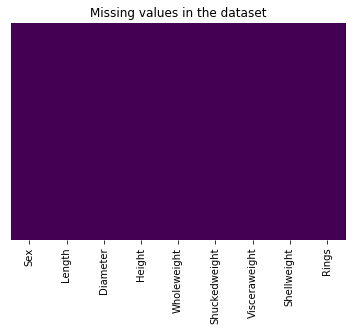

In [10]:
#Checking for Missing values
sns.heatmap(ab.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing values in the dataset')

There are no null values in data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1623c668>,
      dtype=object)

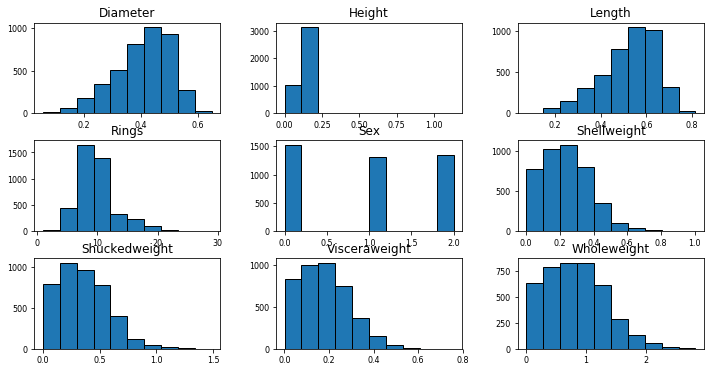

In [28]:
# looking over how different features are distributed in data
ab.hist(edgecolor='black',grid=False,xlabelsize=8,ylabelsize=8)
fig=plt.gcf()
fig.set_size_inches(12,6)

In [26]:
# converting categorical string values into nummeriacal
ab['Sex'].replace(to_replace='M', value = 0, inplace=True)
ab['Sex'].replace(to_replace='F', value = 1, inplace=True)
ab['Sex'].replace(to_replace='I', value = 2, inplace=True)

In [29]:
##Separating the Independent and Dependent Variables
X = ab.iloc[:, :-1].values
y = ab.iloc[:, -1].values

In [37]:
# Split into training and test set
# 80% of the input for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state=20)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(3341, 8) (3341,)
(836, 8) (836,)


### Linear Regression

In [31]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Now, lets do 10 fold cross validation to check the accuracy of the model

In [88]:
mean_cross_val_score_lin = np.mean(cross_val_score(lr, X_train, y_train, cv=10))
mean_cross_val_score_lin

0.5218473506934793

Mean cross validation score with Linear regression is 0.522, lests check the score on test set

In [53]:
test_score_lin = lr.score(X_test, y_test)
test_score_lin

0.5047798682876703

The test score is even less 0.504, 
Now lets try and fit polynomial regression.

### Polynomial Regression

In [74]:
poly = PolynomialFeatures(degree=3)
poly_X_train = poly.fit_transform(X_train)
poly_X_test = poly.fit_transform(X_test)

In [75]:
poly_reg = LinearRegression()
poly_reg.fit(poly_X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Now, lets do 10 fold cross validation to check the accuracy of the model

In [76]:
mean_cross_val_score_poly = np.mean(cross_val_score(poly_reg, poly_X_train,y_train,cv=10))
mean_cross_val_score_poly

0.43832267895305704

Mean cross validation score with Polynomial regression is 0.438, lests check the score on test set

In [57]:
test_score_poly = poly_reg.score(poly_X_test,y_test)
test_score_poly

0.5195843575726615

The test score is increased bit 0.519, Now lets cross validation to find best degree

In [64]:
#performing cross validation to find best degree
max_score = 0
for degree in tqdm(np.arange(10)):
    poly = PolynomialFeatures(degree=degree)
    poly_X_train = poly.fit_transform(X_train)
    mean_score = np.mean(cross_val_score(poly_reg, poly_X_train,y_train,cv=10))
    if mean_score > max_score:
        max_score = mean_score
        max_degree = degree
max_score, max_degree

100%|██████████| 10/10 [12:37<00:00, 157.81s/it]


(0.5218473506934793, 1)

In [89]:
mean_cross_val_score_poly_tune = max_score
mean_cross_val_score_poly_tune

0.5218473506934793

Best degree is 1 and score is 0.521

### Random Forest Regression

In [112]:
# RFR model without hyperparameter tuning
rf = RandomForestRegressor(random_state=20)
rf.fit(X_train, y_train)
rf_b_hpt=rf.score(X_test,y_test)

print('Model Accuracy: {}%'.format(rf_b_hpt * 100))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=20, verbose=0, warm_start=False)

Model Accuracy: 50.49702597218659%


In [113]:
# RFR with grid search (for hyperparameter tuning)
prmts = {
            'n_estimators':[5,10,15],
            'criterion':['mae','mse'],
            'max_depth':np.arange(1,10),
            'oob_score':['True','False'],       
        }

rfgs = GridSearchCV(rf,prmts,cv=5)
rfgs.fit(X,y)
print('Best Score: {}%'.format(rfgs.best_score_ * 100))
print('Best Parameters: {}'.format(rfgs.best_params_))

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=20, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [5, 10, 15], 'criterion': ['mae', 'mse'], 'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'oob_score': ['True', 'False']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Best Score: 46.44595467518877%
Best Parameters: {'criterion': 'mae', 'max_depth': 8, 'n_estimators': 15, 'oob_score': 'True'}


In [115]:
#RFR with best parameters after hyperparameter tuning
rfbst = RandomForestRegressor(criterion='mae',max_depth= 8,n_estimators=15,oob_score= 'True' )
rfbst.fit(X_train,y_train)
rf_bst_score=rfbst.score(X_test,y_test)
print('Model Accuracy: {}%'.format(rf_bst_score * 100))

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=8,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
           oob_score='True', random_state=None, verbose=0,
           warm_start=False)

Model Accuracy: 52.134466378200386%


### Support Vector Regression

In [102]:
#As we know that Support vector regression is distanse based metric, feature scaling is necessary for it
scale_X = StandardScaler()
scale_y = StandardScaler()
X_scale = scale_X.fit_transform(X)
y_scale= scale_y.fit_transform(y.reshape(-1, 1))

In [103]:
#Sepearating train and test
X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(X_scale,y_scale,test_size = 0.20, random_state=20)

In [118]:
# SVR model without hyperparameter tuning
svr = SVR()
svr.fit(X_train_sc,y_train_sc)
svr_b_hpt=svr.score(X_test_sc,y_test_sc)

print('Model Accuracy: {}%'.format(svr_b_hpt * 100))

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Model Accuracy: 54.28336387834721%


In [116]:
# SVR with grid search (for hyperparameter tuning)
prmts = {
            'C':[1,10,50],
            'kernel':['linear', 'poly', 'rbf'],
            'degree':[1,2,3],
            'gamma':[0.0001,0.001,0.01],
            'tol':[0.01,0.1,1]        
        }

svrgs = GridSearchCV(svr,prmts,cv=5)
svrgs.fit(X_scale,y_scale)
print('Best Score: {}%'.format(svrgs.best_score_ * 100))
print('Best Parameters: {}'.format(svrgs.best_params_))

GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1, 10, 50], 'kernel': ['linear', 'poly', 'rbf'], 'degree': [1, 2, 3], 'gamma': [0.0001, 0.001, 0.01], 'tol': [0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Best Score: 50.11693509312812%
Best Parameters: {'C': 50, 'degree': 1, 'gamma': 0.01, 'kernel': 'rbf', 'tol': 0.01}


In [117]:
#SVR with best parameters after hyperparameter tuning
svrbst = SVR(C = 50, degree= 1, gamma = 0.01,kernel='rbf',tol= 0.01 )
svrbst.fit(X_train_sc,y_train_sc)
svr_bst_score=svrbst.score(X_test_sc,y_test_sc)

print('Model Accuracy: {}%'.format(svr_bst_score * 100))

SVR(C=50, cache_size=200, coef0=0.0, degree=1, epsilon=0.1, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.01, verbose=False)

Model Accuracy: 53.93707514733068%


## Conclusion

Among all the models we can compare and see that SVR model without hyperparameter tuning has highest score i.e.54.28 although overall scoring of all the models are not good so,its need further feature addition, such as weather patterns and location (hence food availability) features may be required to improve the accuracy of the model.